#**Iris project**

<font color= red> The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor)</font> .

<font color= green> The dataset contains a set of 150 records under 5 attributes 
- Petal Length
-Petal Width 
-Sepal Length
-Sepal width
- Class(Species).</font>





---

import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



---

Get Data 



In [ ]:
import io
from google.colab import files
uploaded = files.upload()
data = io.BytesIO(uploaded['IRIS.csv']) 
IRIS=pd.read_csv('IRIS.csv')

Saving IRIS.csv to IRIS.csv




---
Dataset 


In [ ]:
IRIS.shape

(150, 5)

In [ ]:
IRIS

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
IRIS.head()#to show first 5 col

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
IRIS.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
IRIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
IRIS.isna().sum() # check for missing values in data.
#cleaning

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
IRIS['species'].unique()# to show type IRIS flower when i use labelencoder it change to 0,1,2 in same order

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
IRIS["species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64



---

Visualization dataset 

    1-histplot

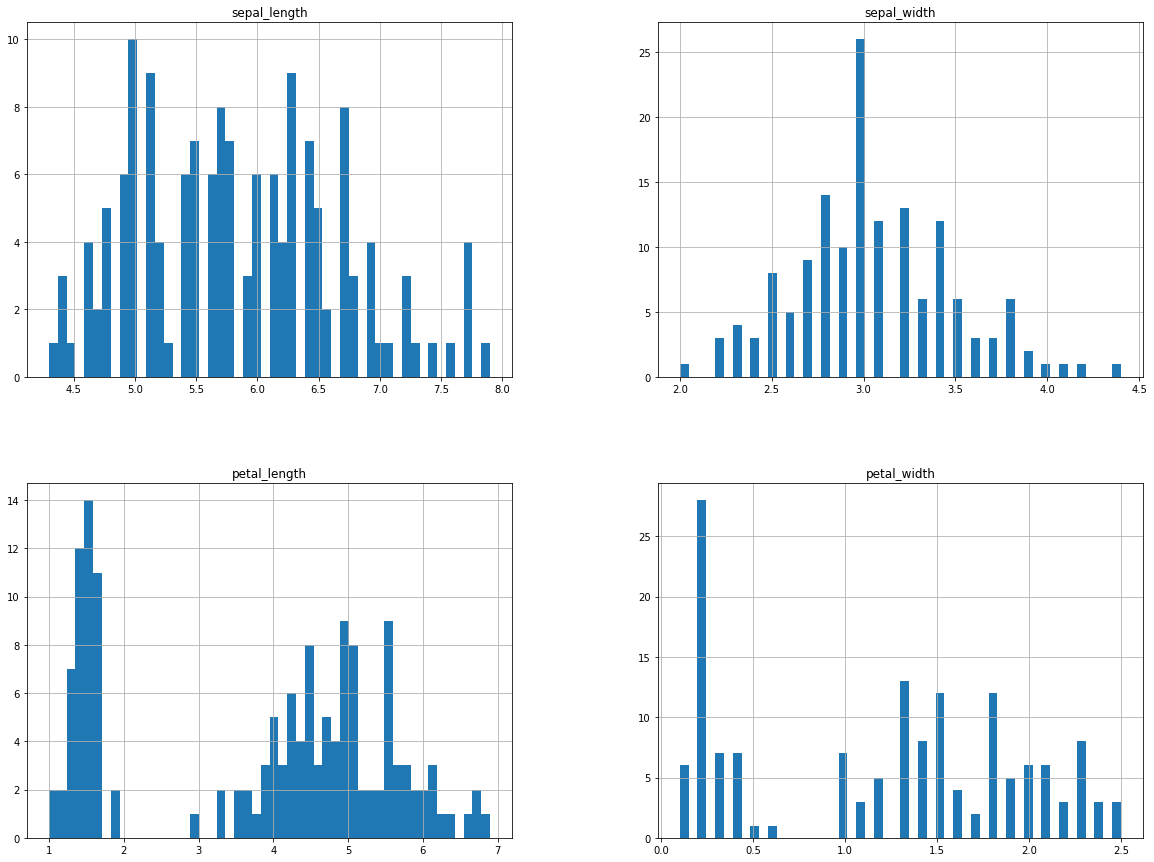

In [ ]:
IRIS.hist(bins=50, figsize=(20,15))
plt.show()
#the X axis is show the max value for each features

    2-pairPlot

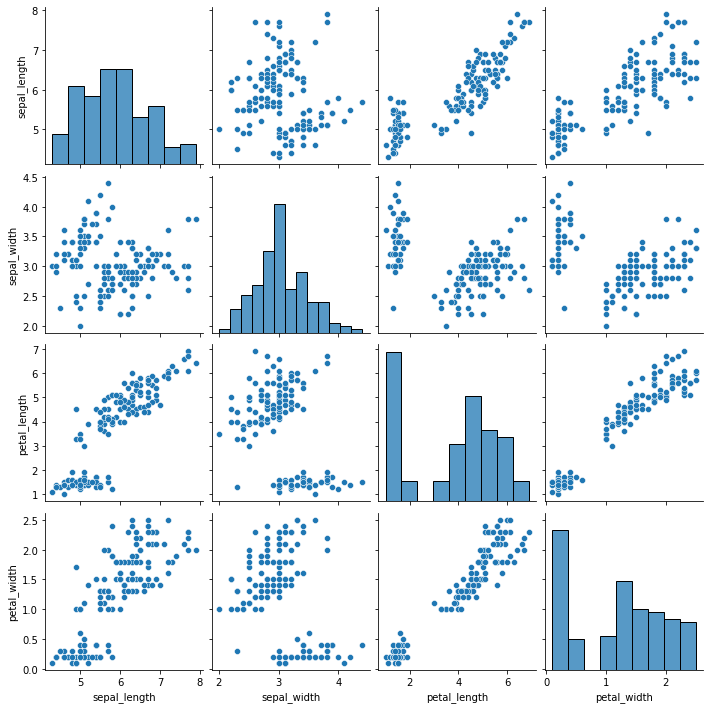

In [ ]:
sns.pairplot(data=IRIS)
plt.show()

    3-join plot

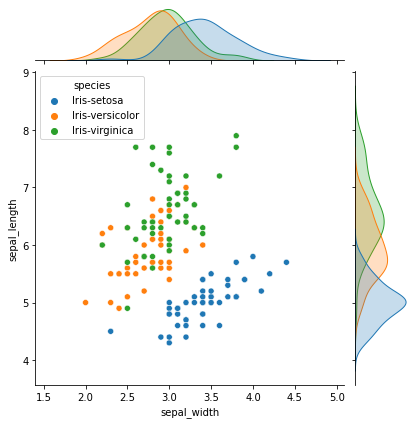

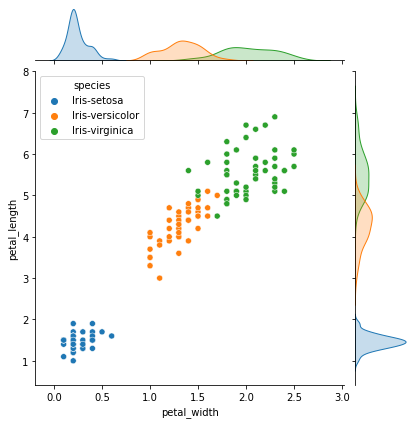

In [ ]:
sns.jointplot(data=IRIS,y='sepal_length',x='sepal_width',hue='species')
plt.show()
sns.jointplot(data=IRIS,y='petal_length',x='petal_width',hue='species')
plt.show()

    4-histplot

In [1]:
sns.histplot(data=IRIS,x='petal_width',hue='species')
plt.show()

sns.histplot(data=IRIS,x='sepal_length',hue='species')
plt.show()

NameError: ignored

    5-heatmap

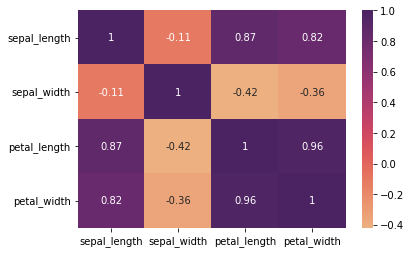

In [ ]:
corr=IRIS.corr()
sns.heatmap(corr,annot=True,cmap='flare')
plt.show()
#to show the 

    6-box plot

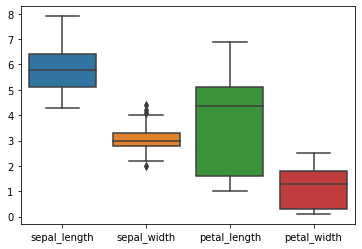

In [ ]:
sns.boxplot(data=IRIS)
#we just have litte outliers in sepal_width can be neglected

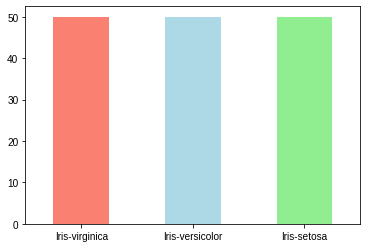

In [ ]:
IRIS["species"].value_counts().plot(
    kind="bar", color=["salmon", "lightblue", "lightgreen"])
plt.xticks(rotation=0)

plt.style.use("default")
plt.style.use("seaborn-whitegrid")



---

the data is cleaning  now 👍


---


now split data to 3 catagory حسب ال species using onehotencodering 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
IRIS['species']=le.fit_transform(IRIS['species'])

In [ ]:
IRIS.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
IRIS['species'].unique()

array([0, 1, 2])

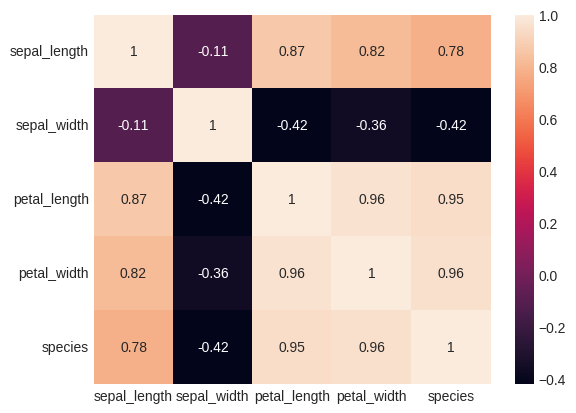

In [ ]:
#IRIS1.corr()
sns.heatmap(IRIS.corr(), cbar=True, annot=True)



---
Model from SKlearn

    train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X = IRIS.drop("species", axis=1)
y = IRIS["species"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


    logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions_logistic = logistic.predict(X_test)
predictions_logistic

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print("logistic Accuracy: ",logistic.score(X_test,y_test))

logistic Accuracy:  1.0


    KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions_KNN = KNN.predict(X_test)

In [ ]:
print("KNN accuracy: ",KNN.score(X_test,y_test))

KNN accuracy:  1.0


    RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier()
Random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Random Accuracy: ',Random.score(X_test,y_test))

Random Accuracy:  1.0


#Evaluation

>We can check precision,recall,f1-score using classification report!


In [ ]:
from sklearn.metrics import classification_report
print("logistic")
print(classification_report(y_test,predictions_logistic))

print("KNN")
print(classification_report(y_test,predictions_KNN))


logistic
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



>Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions_logistic))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]




> cross_val_score



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(Random, X, y, cv=5)

In [ ]:
print('Model accuracy: ', np.mean(scores))

Model accuracy:  0.9666666666666668


**Hyperparametrization**

>**We start with Random Search to find ideal hyperparameters to use with GridSearch for Random Forest Regression.**



> RandomizedSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# These are the most important hyperparameters for Random Forest.
rf_random = RandomizedSearchCV(estimator = Random, param_distributions = random_grid,n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}



> GridSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110,120],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [1, 2, 3,4],
    'n_estimators': [600, 700, 800, 900, 1000, 1500]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 59.3min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 70.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test) # Best estimator was the Random Search Estimator.

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
